In [1]:
import seaborn as sb
from matplotlib.colors import BoundaryNorm
import matplotlib.ticker as ticker
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import matplotlib as mpl
import geopandas as gpd
from osgeo import gdal
import pandas as pd
from matplotlib.patches import Patch
import matplotlib.ticker as ticker
import numpy as np

In [2]:
mpl.rcParams['hatch.linewidth'] = 0.2
plt.rcParams["font.sans-serif"] = "Arial"
# plt.rcParams["font.weight"] = "bold"
# plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams.update({"font.size":6})

In [3]:
def get_geotiff_data(path):
    """
    get gdal raster data
    """
    ds = gdal.Open(path)
    gt = ds.GetGeoTransform()
    array = ds.ReadAsArray()
    array = array[:1501, :]
    
    xsize = ds.RasterXSize
    ysize = ds.RasterYSize
    
    xres, yres = gt[1], gt[5]
    xcor, ycor = gt[0], gt[3]
    
    lat = np.arange(ycor+0.5*yres, ycor+0.5*yres + yres*ysize, yres)[:1501]
    lon = np.arange(xcor+0.5*xres, xcor+0.5*xres + xres*xsize, xres)
    return lon, lat, array

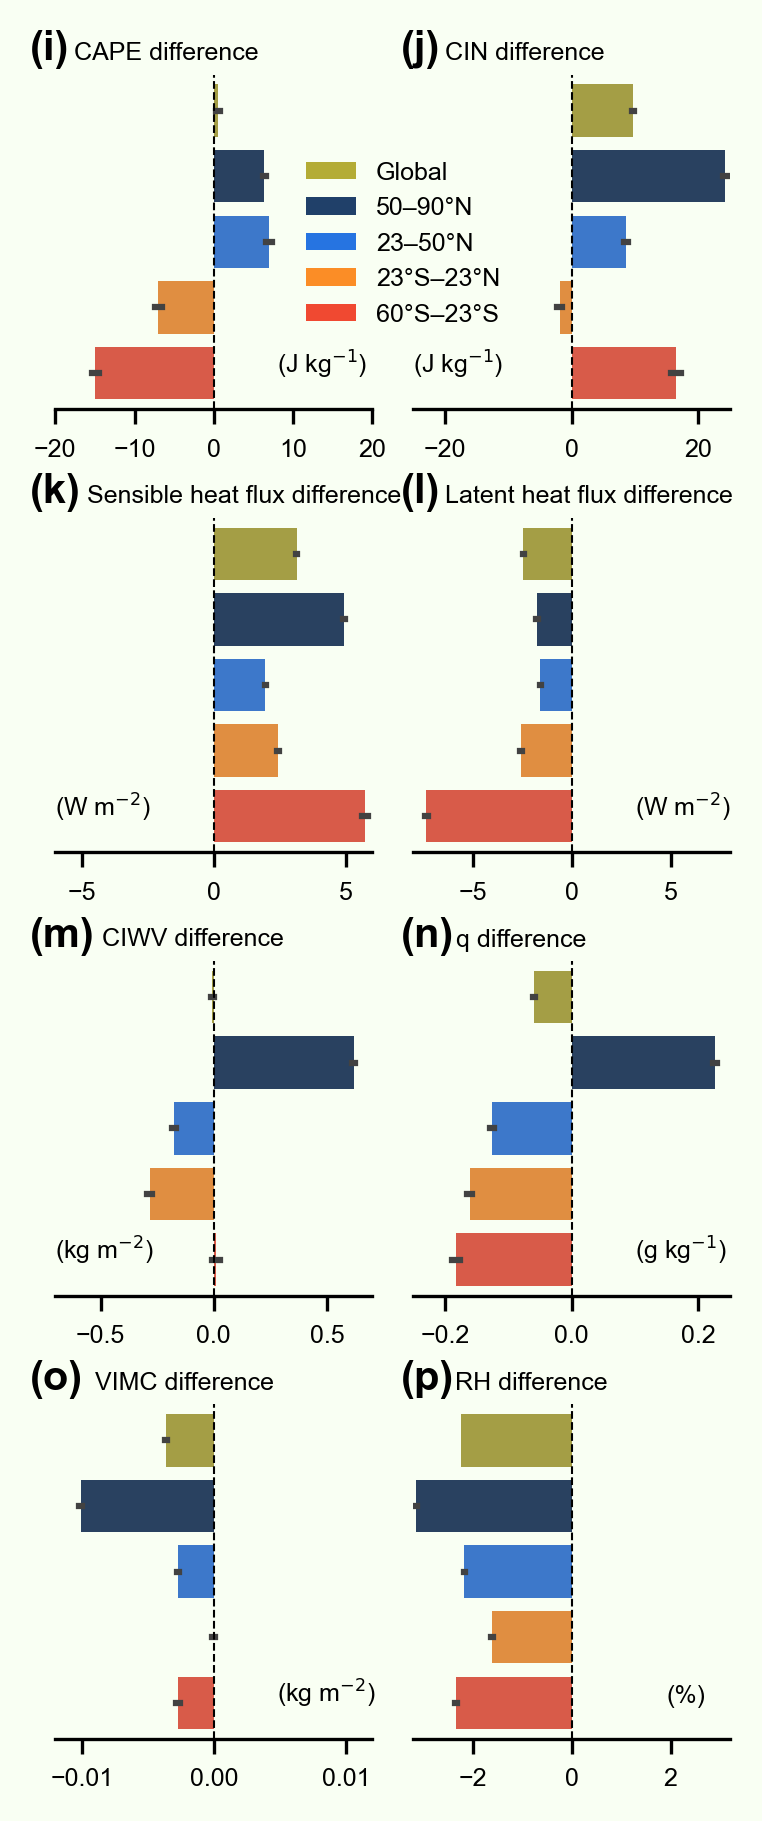

In [4]:
fig = plt.figure(figsize=(2.5,6), dpi=300)
ax1 = fig.add_subplot(4, 2, 1)
ax2 = fig.add_subplot(4, 2, 2)
ax3 = fig.add_subplot(4, 2, 3)
ax4 = fig.add_subplot(4, 2, 4)
ax5 = fig.add_subplot(4, 2, 5)
ax6 = fig.add_subplot(4, 2, 6)
ax7 = fig.add_subplot(4, 2, 7)
ax8 = fig.add_subplot(4, 2, 8)

#ax1 cape
cape_global_0sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_differences_reproj\cape_0sigma_diff.tif")[2].reshape(-1)
cape_global_1sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_differences_reproj\cape_1sigma_diff.tif")[2].reshape(-1)
cape_global_2sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_differences_reproj\cape_2sigma_diff.tif")[2].reshape(-1)
cape_global_3sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_differences_reproj\cape_3sigma_diff.tif")[2].reshape(-1)

cape_bot_0sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\-60,-23_cape_0sigma_diff.tif")[2].reshape(-1)
cape_bot_1sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\-60,-23_cape_1sigma_diff.tif")[2].reshape(-1)
cape_bot_2sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\-60,-23_cape_2sigma_diff.tif")[2].reshape(-1)
cape_bot_3sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\-60,-23_cape_3sigma_diff.tif")[2].reshape(-1)

cape_botmid_0sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\-23,23_cape_0sigma_diff.tif")[2].reshape(-1)
cape_botmid_1sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\-23,23_cape_1sigma_diff.tif")[2].reshape(-1)
cape_botmid_2sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\-23,23_cape_2sigma_diff.tif")[2].reshape(-1)
cape_botmid_3sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\-23,23_cape_3sigma_diff.tif")[2].reshape(-1)

cape_topmid_0sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\23,50_cape_0sigma_diff.tif")[2].reshape(-1)
cape_topmid_1sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\23,50_cape_1sigma_diff.tif")[2].reshape(-1)
cape_topmid_2sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\23,50_cape_2sigma_diff.tif")[2].reshape(-1)
cape_topmid_3sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\23,50_cape_3sigma_diff.tif")[2].reshape(-1)

cape_top_0sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\50,90_cape_0sigma_diff.tif")[2].reshape(-1)
cape_top_1sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\50,90_cape_1sigma_diff.tif")[2].reshape(-1)
cape_top_2sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\50,90_cape_2sigma_diff.tif")[2].reshape(-1)
cape_top_3sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\50,90_cape_3sigma_diff.tif")[2].reshape(-1)

cin_global_0sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_differences_reproj\cin_0sigma_diff.tif")[2].reshape(-1)
cin_global_1sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_differences_reproj\cin_1sigma_diff.tif")[2].reshape(-1)
cin_global_2sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_differences_reproj\cin_2sigma_diff.tif")[2].reshape(-1)
cin_global_3sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_differences_reproj\cin_3sigma_diff.tif")[2].reshape(-1)

cin_bot_0sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\-60,-23_cin_0sigma_diff.tif")[2].reshape(-1)
cin_bot_1sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\-60,-23_cin_1sigma_diff.tif")[2].reshape(-1)
cin_bot_2sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\-60,-23_cin_2sigma_diff.tif")[2].reshape(-1)
cin_bot_3sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\-60,-23_cin_3sigma_diff.tif")[2].reshape(-1)

cin_botmid_0sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\-23,23_cin_0sigma_diff.tif")[2].reshape(-1)
cin_botmid_1sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\-23,23_cin_1sigma_diff.tif")[2].reshape(-1)
cin_botmid_2sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\-23,23_cin_2sigma_diff.tif")[2].reshape(-1)
cin_botmid_3sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\-23,23_cin_3sigma_diff.tif")[2].reshape(-1)

cin_topmid_0sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\23,50_cin_0sigma_diff.tif")[2].reshape(-1)
cin_topmid_1sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\23,50_cin_1sigma_diff.tif")[2].reshape(-1)
cin_topmid_2sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\23,50_cin_2sigma_diff.tif")[2].reshape(-1)
cin_topmid_3sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\23,50_cin_3sigma_diff.tif")[2].reshape(-1)

cin_top_0sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\50,90_cin_0sigma_diff.tif")[2].reshape(-1)
cin_top_1sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\50,90_cin_1sigma_diff.tif")[2].reshape(-1)
cin_top_2sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\50,90_cin_2sigma_diff.tif")[2].reshape(-1)
cin_top_3sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\50,90_cin_3sigma_diff.tif")[2].reshape(-1)

sens_global_0sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_differences_reproj\sens_0sigma_diff.tif")[2].reshape(-1)
sens_global_1sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_differences_reproj\sens_1sigma_diff.tif")[2].reshape(-1)
sens_global_2sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_differences_reproj\sens_2sigma_diff.tif")[2].reshape(-1)
sens_global_3sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_differences_reproj\sens_3sigma_diff.tif")[2].reshape(-1)

sens_bot_0sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\-60,-23_sens_0sigma_diff.tif")[2].reshape(-1)
sens_bot_1sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\-60,-23_sens_1sigma_diff.tif")[2].reshape(-1)
sens_bot_2sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\-60,-23_sens_2sigma_diff.tif")[2].reshape(-1)
sens_bot_3sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\-60,-23_sens_3sigma_diff.tif")[2].reshape(-1)

sens_botmid_0sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\-23,23_sens_0sigma_diff.tif")[2].reshape(-1)
sens_botmid_1sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\-23,23_sens_1sigma_diff.tif")[2].reshape(-1)
sens_botmid_2sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\-23,23_sens_2sigma_diff.tif")[2].reshape(-1)
sens_botmid_3sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\-23,23_sens_3sigma_diff.tif")[2].reshape(-1)

sens_topmid_0sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\23,50_sens_0sigma_diff.tif")[2].reshape(-1)
sens_topmid_1sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\23,50_sens_1sigma_diff.tif")[2].reshape(-1)
sens_topmid_2sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\23,50_sens_2sigma_diff.tif")[2].reshape(-1)
sens_topmid_3sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\23,50_sens_3sigma_diff.tif")[2].reshape(-1)

sens_top_0sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\50,90_sens_0sigma_diff.tif")[2].reshape(-1)
sens_top_1sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\50,90_sens_1sigma_diff.tif")[2].reshape(-1)
sens_top_2sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\50,90_sens_2sigma_diff.tif")[2].reshape(-1)
sens_top_3sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\50,90_sens_3sigma_diff.tif")[2].reshape(-1)

lat_global_0sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_differences_reproj\lat_0sigma_diff.tif")[2].reshape(-1)
lat_global_1sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_differences_reproj\lat_1sigma_diff.tif")[2].reshape(-1)
lat_global_2sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_differences_reproj\lat_2sigma_diff.tif")[2].reshape(-1)
lat_global_3sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_differences_reproj\lat_3sigma_diff.tif")[2].reshape(-1)

lat_bot_0sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\-60,-23_lat_0sigma_diff.tif")[2].reshape(-1)
lat_bot_1sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\-60,-23_lat_1sigma_diff.tif")[2].reshape(-1)
lat_bot_2sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\-60,-23_lat_2sigma_diff.tif")[2].reshape(-1)
lat_bot_3sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\-60,-23_lat_3sigma_diff.tif")[2].reshape(-1)

lat_botmid_0sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\-23,23_lat_0sigma_diff.tif")[2].reshape(-1)
lat_botmid_1sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\-23,23_lat_1sigma_diff.tif")[2].reshape(-1)
lat_botmid_2sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\-23,23_lat_2sigma_diff.tif")[2].reshape(-1)
lat_botmid_3sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\-23,23_lat_3sigma_diff.tif")[2].reshape(-1)

lat_topmid_0sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\23,50_lat_0sigma_diff.tif")[2].reshape(-1)
lat_topmid_1sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\23,50_lat_1sigma_diff.tif")[2].reshape(-1)
lat_topmid_2sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\23,50_lat_2sigma_diff.tif")[2].reshape(-1)
lat_topmid_3sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\23,50_lat_3sigma_diff.tif")[2].reshape(-1)

lat_top_0sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\50,90_lat_0sigma_diff.tif")[2].reshape(-1)
lat_top_1sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\50,90_lat_1sigma_diff.tif")[2].reshape(-1)
lat_top_2sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\50,90_lat_2sigma_diff.tif")[2].reshape(-1)
lat_top_3sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\50,90_lat_3sigma_diff.tif")[2].reshape(-1)

ciwv_global_0sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_differences_reproj\ciwv_0sigma_diff.tif")[2].reshape(-1)
ciwv_global_1sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_differences_reproj\ciwv_1sigma_diff.tif")[2].reshape(-1)
ciwv_global_2sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_differences_reproj\ciwv_2sigma_diff.tif")[2].reshape(-1)
ciwv_global_3sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_differences_reproj\ciwv_3sigma_diff.tif")[2].reshape(-1)

ciwv_bot_0sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\-60,-23_ciwv_0sigma_diff.tif")[2].reshape(-1)
ciwv_bot_1sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\-60,-23_ciwv_1sigma_diff.tif")[2].reshape(-1)
ciwv_bot_2sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\-60,-23_ciwv_2sigma_diff.tif")[2].reshape(-1)
ciwv_bot_3sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\-60,-23_ciwv_3sigma_diff.tif")[2].reshape(-1)

ciwv_botmid_0sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\-23,23_ciwv_0sigma_diff.tif")[2].reshape(-1)
ciwv_botmid_1sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\-23,23_ciwv_1sigma_diff.tif")[2].reshape(-1)
ciwv_botmid_2sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\-23,23_ciwv_2sigma_diff.tif")[2].reshape(-1)
ciwv_botmid_3sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\-23,23_ciwv_3sigma_diff.tif")[2].reshape(-1)

ciwv_topmid_0sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\23,50_ciwv_0sigma_diff.tif")[2].reshape(-1)
ciwv_topmid_1sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\23,50_ciwv_1sigma_diff.tif")[2].reshape(-1)
ciwv_topmid_2sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\23,50_ciwv_2sigma_diff.tif")[2].reshape(-1)
ciwv_topmid_3sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\23,50_ciwv_3sigma_diff.tif")[2].reshape(-1)

ciwv_top_0sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\50,90_ciwv_0sigma_diff.tif")[2].reshape(-1)
ciwv_top_1sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\50,90_ciwv_1sigma_diff.tif")[2].reshape(-1)
ciwv_top_2sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\50,90_ciwv_2sigma_diff.tif")[2].reshape(-1)
ciwv_top_3sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\50,90_ciwv_3sigma_diff.tif")[2].reshape(-1)

q_global_0sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_differences_reproj\q_0sigma_diff.tif")[2].reshape(-1)*1000
q_global_1sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_differences_reproj\q_1sigma_diff.tif")[2].reshape(-1)*1000
q_global_2sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_differences_reproj\q_2sigma_diff.tif")[2].reshape(-1)*1000
q_global_3sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_differences_reproj\q_3sigma_diff.tif")[2].reshape(-1)*1000

q_bot_0sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\-60,-23_q_0sigma_diff.tif")[2].reshape(-1)*1000
q_bot_1sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\-60,-23_q_1sigma_diff.tif")[2].reshape(-1)*1000
q_bot_2sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\-60,-23_q_2sigma_diff.tif")[2].reshape(-1)*1000
q_bot_3sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\-60,-23_q_3sigma_diff.tif")[2].reshape(-1)*1000

q_botmid_0sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\-23,23_q_0sigma_diff.tif")[2].reshape(-1)*1000
q_botmid_1sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\-23,23_q_1sigma_diff.tif")[2].reshape(-1)*1000
q_botmid_2sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\-23,23_q_2sigma_diff.tif")[2].reshape(-1)*1000
q_botmid_3sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\-23,23_q_3sigma_diff.tif")[2].reshape(-1)*1000

q_topmid_0sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\23,50_q_0sigma_diff.tif")[2].reshape(-1)*1000
q_topmid_1sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\23,50_q_1sigma_diff.tif")[2].reshape(-1)*1000
q_topmid_2sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\23,50_q_2sigma_diff.tif")[2].reshape(-1)*1000
q_topmid_3sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\23,50_q_3sigma_diff.tif")[2].reshape(-1)*1000

q_top_0sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\50,90_q_0sigma_diff.tif")[2].reshape(-1)*1000
q_top_1sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\50,90_q_1sigma_diff.tif")[2].reshape(-1)*1000
q_top_2sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\50,90_q_2sigma_diff.tif")[2].reshape(-1)*1000
q_top_3sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\50,90_q_3sigma_diff.tif")[2].reshape(-1)*1000

vimc_global_0sigma = -get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_differences_reproj\vimc_0sigma_diff.tif")[2].reshape(-1)
vimc_global_1sigma = -get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_differences_reproj\vimc_1sigma_diff.tif")[2].reshape(-1)
vimc_global_2sigma = -get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_differences_reproj\vimc_2sigma_diff.tif")[2].reshape(-1)
vimc_global_3sigma = -get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_differences_reproj\vimc_3sigma_diff.tif")[2].reshape(-1)

vimc_bot_0sigma = -get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\-60,-23_vimc_0sigma_diff.tif")[2].reshape(-1)
vimc_bot_1sigma = -get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\-60,-23_vimc_1sigma_diff.tif")[2].reshape(-1)
vimc_bot_2sigma = -get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\-60,-23_vimc_2sigma_diff.tif")[2].reshape(-1)
vimc_bot_3sigma = -get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\-60,-23_vimc_3sigma_diff.tif")[2].reshape(-1)

vimc_botmid_0sigma = -get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\-23,23_vimc_0sigma_diff.tif")[2].reshape(-1)
vimc_botmid_1sigma = -get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\-23,23_vimc_1sigma_diff.tif")[2].reshape(-1)
vimc_botmid_2sigma = -get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\-23,23_vimc_2sigma_diff.tif")[2].reshape(-1)
vimc_botmid_3sigma = -get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\-23,23_vimc_3sigma_diff.tif")[2].reshape(-1)

vimc_topmid_0sigma = -get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\23,50_vimc_0sigma_diff.tif")[2].reshape(-1)
vimc_topmid_1sigma = -get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\23,50_vimc_1sigma_diff.tif")[2].reshape(-1)
vimc_topmid_2sigma = -get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\23,50_vimc_2sigma_diff.tif")[2].reshape(-1)
vimc_topmid_3sigma = -get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\23,50_vimc_3sigma_diff.tif")[2].reshape(-1)

vimc_top_0sigma = -get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\50,90_vimc_0sigma_diff.tif")[2].reshape(-1)
vimc_top_1sigma = -get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\50,90_vimc_1sigma_diff.tif")[2].reshape(-1)
vimc_top_2sigma = -get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\50,90_vimc_2sigma_diff.tif")[2].reshape(-1)
vimc_top_3sigma = -get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\50,90_vimc_3sigma_diff.tif")[2].reshape(-1)
RH_global_0sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_differences_reproj\RH_0sigma_diff.tif")[2].reshape(-1)*100
RH_global_1sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_differences_reproj\RH_1sigma_diff.tif")[2].reshape(-1)*100
RH_global_2sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_differences_reproj\RH_2sigma_diff.tif")[2].reshape(-1)*100
RH_global_3sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_differences_reproj\RH_3sigma_diff.tif")[2].reshape(-1)*100

RH_bot_0sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\-60,-23_RH_0sigma_diff.tif")[2].reshape(-1)*100
RH_bot_1sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\-60,-23_RH_1sigma_diff.tif")[2].reshape(-1)*100
RH_bot_2sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\-60,-23_RH_2sigma_diff.tif")[2].reshape(-1)*100
RH_bot_3sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\-60,-23_RH_3sigma_diff.tif")[2].reshape(-1)*100

RH_botmid_0sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\-23,23_RH_0sigma_diff.tif")[2].reshape(-1)*100
RH_botmid_1sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\-23,23_RH_1sigma_diff.tif")[2].reshape(-1)*100
RH_botmid_2sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\-23,23_RH_2sigma_diff.tif")[2].reshape(-1)*100
RH_botmid_3sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\-23,23_RH_3sigma_diff.tif")[2].reshape(-1)*100

RH_topmid_0sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\23,50_RH_0sigma_diff.tif")[2].reshape(-1)*100
RH_topmid_1sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\23,50_RH_1sigma_diff.tif")[2].reshape(-1)*100
RH_topmid_2sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\23,50_RH_2sigma_diff.tif")[2].reshape(-1)*100
RH_topmid_3sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\23,50_RH_3sigma_diff.tif")[2].reshape(-1)*100

RH_top_0sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\50,90_RH_0sigma_diff.tif")[2].reshape(-1)*100
RH_top_1sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\50,90_RH_1sigma_diff.tif")[2].reshape(-1)*100
RH_top_2sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\50,90_RH_2sigma_diff.tif")[2].reshape(-1)*100
RH_top_3sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_atms_difference_reproj_subregions\50,90_RH_3sigma_diff.tif")[2].reshape(-1)*100


data1 = [[], cape_bot_2sigma[~np.isnan(cape_bot_2sigma)], cape_botmid_2sigma[~np.isnan(cape_botmid_2sigma)], cape_topmid_2sigma[~np.isnan(cape_topmid_2sigma)], cape_top_2sigma[~np.isnan(cape_top_2sigma)], cape_global_2sigma[~np.isnan(cape_global_2sigma)]]

colors = ["none", "#F04931", "#FB8D26", "#2674E1", "#204069", "#B4AC35"]
sb.barplot(data = data1, errorbar=("ci", 95), linewidth=2.5, edgecolor=None, palette=colors, errwidth=1.5, orient='h', ax=ax1)
ax1.vlines(0,0.45,5.55,color="k", linewidth=0.5, linestyle="--")
ax1.set_ylim(0.45, 6)
ax1.spines['top'].set_visible(False)  
ax1.spines['right'].set_visible(False)  
ax1.spines['left'].set_visible(False)  
ax1.set_yticks([])

data1 = [[], cin_bot_2sigma[~np.isnan(cin_bot_2sigma)], cin_botmid_2sigma[~np.isnan(cin_botmid_2sigma)], cin_topmid_2sigma[~np.isnan(cin_topmid_2sigma)], cin_top_2sigma[~np.isnan(cin_top_2sigma)], cin_global_2sigma[~np.isnan(cin_global_2sigma)]]

sb.barplot(data = data1, errorbar=("ci", 95), linewidth=2.5, edgecolor=None, palette=colors, errwidth=1.5, orient='h', ax=ax2)
ax2.vlines(0,0.45,5.55,color="k", linewidth=0.5, linestyle="--")
ax2.set_ylim(0.45, 6)
ax2.spines['top'].set_visible(False)  
ax2.spines['right'].set_visible(False)  
ax2.spines['left'].set_visible(False)  
ax2.set_yticks([])

data1 = [[], sens_bot_2sigma[~np.isnan(sens_bot_2sigma)], sens_botmid_2sigma[~np.isnan(sens_botmid_2sigma)], sens_topmid_2sigma[~np.isnan(sens_topmid_2sigma)], sens_top_2sigma[~np.isnan(sens_top_2sigma)], sens_global_2sigma[~np.isnan(sens_global_2sigma)]]

sb.barplot(data = data1, errorbar=("ci", 95), linewidth=2.5, edgecolor=None, palette=colors, errwidth=1.5, orient='h', ax=ax3)
ax3.vlines(0,0.45,5.55,color="k", linewidth=0.5, linestyle="--")
ax3.set_ylim(0.45, 6)
ax3.spines['top'].set_visible(False)  
ax3.spines['right'].set_visible(False)  
ax3.spines['left'].set_visible(False)  
ax3.set_yticks([])

data1 = [[], lat_bot_2sigma[~np.isnan(lat_bot_2sigma)], lat_botmid_2sigma[~np.isnan(lat_botmid_2sigma)], lat_topmid_2sigma[~np.isnan(lat_topmid_2sigma)], lat_top_2sigma[~np.isnan(lat_top_2sigma)], lat_global_2sigma[~np.isnan(lat_global_2sigma)]]

sb.barplot(data = data1, errorbar=("ci", 95), linewidth=2.5, edgecolor=None, palette=colors, errwidth=1.5, orient='h', ax=ax4)
ax4.vlines(0,0.45,5.55,color="k", linewidth=0.5, linestyle="--")
ax4.set_ylim(0.45, 6)
ax4.spines['top'].set_visible(False)  
ax4.spines['right'].set_visible(False)  
ax4.spines['left'].set_visible(False)  
ax4.set_yticks([])

data1 = [[], ciwv_bot_2sigma[~np.isnan(ciwv_bot_2sigma)], ciwv_botmid_2sigma[~np.isnan(ciwv_botmid_2sigma)], ciwv_topmid_2sigma[~np.isnan(ciwv_topmid_2sigma)], ciwv_top_2sigma[~np.isnan(ciwv_top_2sigma)], ciwv_global_2sigma[~np.isnan(ciwv_global_2sigma)]]

sb.barplot(data = data1, errorbar=("ci", 95), linewidth=2.5, edgecolor=None, palette=colors, errwidth=1.5, orient='h', ax=ax5)
ax5.vlines(0,0.45,5.55,color="k", linewidth=0.5, linestyle="--")
ax5.set_ylim(0.45, 6)
ax5.spines['top'].set_visible(False)  
ax5.spines['right'].set_visible(False)  
ax5.spines['left'].set_visible(False)  
ax5.set_yticks([])

data1 = [[], q_bot_2sigma[~np.isnan(q_bot_2sigma)], q_botmid_2sigma[~np.isnan(q_botmid_2sigma)], q_topmid_2sigma[~np.isnan(q_topmid_2sigma)], q_top_2sigma[~np.isnan(q_top_2sigma)], q_global_2sigma[~np.isnan(q_global_2sigma)]]

sb.barplot(data = data1, errorbar=("ci", 95), linewidth=2.5, edgecolor=None, palette=colors, errwidth=1.5, orient='h', ax=ax6)
ax6.vlines(0,0.45,5.55,color="k", linewidth=0.5, linestyle="--")
ax6.set_ylim(0.45, 6)
ax6.spines['top'].set_visible(False)  
ax6.spines['right'].set_visible(False)  
ax6.spines['left'].set_visible(False)  
ax6.set_yticks([])

data1 = [[], vimc_bot_2sigma[~np.isnan(vimc_bot_2sigma)], vimc_botmid_2sigma[~np.isnan(vimc_botmid_2sigma)], vimc_topmid_2sigma[~np.isnan(vimc_topmid_2sigma)], vimc_top_2sigma[~np.isnan(vimc_top_2sigma)], vimc_global_2sigma[~np.isnan(vimc_global_2sigma)]]

sb.barplot(data = data1, errorbar=("ci", 95), linewidth=2.5, edgecolor=None, palette=colors, errwidth=1.5, orient='h', ax=ax7)
ax7.vlines(0,0.45,5.55,color="k", linewidth=0.5, linestyle="--")
ax7.set_ylim(0.45, 6)
ax7.spines['top'].set_visible(False)  
ax7.spines['right'].set_visible(False)  
ax7.spines['left'].set_visible(False)  
ax7.set_yticks([])

data1 = [[], RH_bot_2sigma[~np.isnan(RH_bot_2sigma)], RH_botmid_2sigma[~np.isnan(RH_botmid_2sigma)], RH_topmid_2sigma[~np.isnan(RH_topmid_2sigma)], RH_top_2sigma[~np.isnan(RH_top_2sigma)], RH_global_2sigma[~np.isnan(RH_global_2sigma)]]

sb.barplot(data = data1, errorbar=("ci", 95), linewidth=2.5, edgecolor=None, palette=colors, errwidth=1.5, orient='h', ax=ax8)
ax8.vlines(0,0.45,5.55,color="k", linewidth=0.5, linestyle="--")
ax8.set_ylim(0.45, 6)
ax8.spines['top'].set_visible(False)  
ax8.spines['right'].set_visible(False)  
ax8.spines['left'].set_visible(False)  
ax8.set_yticks([])

ax1.set_xlim(-20, 20)
ax2.set_xlim(-25, 25)
ax3.set_xlim(-6, 6)
ax4.set_xlim(-8, 8)
ax5.set_xlim(-0.7, 0.7)
ax6.set_xlim(-0.25, 0.25)
ax7.set_xlim(-0.012, 0.012)
ax8.set_xlim(-3.2, 3.2)
legend_elements = [Patch(facecolor="#B4AC35", edgecolor=None,
                         label='Global'),
                  Patch(facecolor="#204069", edgecolor=None,
                         label='50–90°N'),
                   Patch(facecolor="#2674E1", edgecolor=None,
                         label='23–50°N'),
                  Patch(facecolor="#FB8D26", edgecolor=None,
                         label='23°S–23°N'),
                  Patch(facecolor="#F04931", edgecolor=None,
                         label='60°S–23°S')]

# Create the figure
plt.tight_layout()
ax1.text(
        -0.08, 0.96, "(i)",
        fontsize=10,
        fontweight="bold",
        transform = ax1.transAxes
    )
ax1.text(
        0.06, 0.96, "CAPE difference",
        fontsize=6,
        transform = ax1.transAxes
    )
ax1.text(
        0.7, 0.1, "(J kg$^{-1}$)",
        fontsize=6,
        transform = ax1.transAxes
    )

ax2.text(
        -0.04, 0.96, "(j)",
        fontsize=10,
        fontweight="bold",
        transform = ax2.transAxes
    )
ax2.text(
        0.1, 0.96, "CIN difference",
        fontsize=6,
        transform = ax2.transAxes
    )
ax2.text(
        0, 0.1, "(J kg$^{-1}$)",
        fontsize=6,
        transform = ax2.transAxes
    )

ax3.text(
        -0.08, 0.96, "(k)",
        fontsize=10,
        fontweight="bold",
        transform = ax3.transAxes
    )
ax3.text(
        0.1, 0.96, "Sensible heat flux difference",
        fontsize=6,
        transform = ax3.transAxes
    )
ax3.text(
        0, 0.1, "(W m$^{-2}$)",
        fontsize=6,
        transform = ax3.transAxes
    )
ax4.text(
        -0.04, 0.96, "(l)",
        fontsize=10,
        fontweight="bold",
        transform = ax4.transAxes
    )
ax4.text(
        0.1, 0.96, "Latent heat flux difference",
        fontsize=6,
        transform = ax4.transAxes
    )
ax4.text(
        0.7, 0.1, "(W m$^{-2}$)",
        fontsize=6,
        transform = ax4.transAxes
    )

ax5.text(
        -0.08, 0.96, "(m)",
        fontsize=10,
        fontweight="bold",
        transform = ax5.transAxes
    )
ax5.text(
        0.148, 0.96, "CIWV difference",
        fontsize=6,
        transform = ax5.transAxes
    )
ax5.text(
        0, 0.1, "(kg m$^{-2}$)",
        fontsize=6,
        transform = ax5.transAxes
    ) 

ax6.text(
        -0.04, 0.96, "(n)",
        fontsize=10,
        fontweight="bold",
        transform = ax6.transAxes
    )
ax6.text(
        0.134, 0.96, "q difference",
        fontsize=6,
        transform = ax6.transAxes
    )
ax6.text(
        0.7, 0.1, "(g kg$^{-1}$)",
        fontsize=6,
        transform = ax6.transAxes
    )

ax7.text(
        -0.08, 0.96, "(o)",
        fontsize=10,
        fontweight="bold",
        transform = ax7.transAxes
    )
ax7.text(
        0.125, 0.96, "VIMC difference",
        fontsize=6,
        transform = ax7.transAxes
    )
ax7.text(
        0.7, 0.1, "(kg m$^{-2}$)",
        fontsize=6,
        transform = ax7.transAxes
    )
ax8.text(
        -0.04, 0.96, "(p)",
        fontsize=10,
        fontweight="bold",
        transform = ax8.transAxes
    )
ax8.text(
        0.131, 0.96, "RH difference",
        fontsize=6,
        transform = ax8.transAxes
    )
ax8.text(
        0.8, 0.1, "(%)",
        fontsize=6,
        transform = ax8.transAxes
    )
ax2.legend(handles=legend_elements, loc=(-0.37, 0.2), frameon=False)
fig.patch.set_facecolor('#F9FFF3')
ax1.set_facecolor('#F9FFF3')
ax2.set_facecolor('#F9FFF3')
ax3.set_facecolor('#F9FFF3')
ax4.set_facecolor('#F9FFF3')
ax5.set_facecolor('#F9FFF3')
ax6.set_facecolor('#F9FFF3')
ax7.set_facecolor('#F9FFF3')
ax8.set_facecolor('#F9FFF3')


plt.savefig(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\figs\diff_lat_stats_2sigma.jpg", dpi=300)